In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [6]:
columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=columns)

In [7]:
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df_pos_neg = df[df['sentiment'].isin([0, 4])]

In [9]:
sample_size = 5000
pos_texts = df[df['sentiment'] == 4].sample(sample_size, random_state=42)['text']
neg_texts = df[df['sentiment'] == 0].sample(sample_size, random_state=42)['text']

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

pos_clean = pos_texts.apply(clean_text)
neg_clean = neg_texts.apply(clean_text)

In [11]:
pos_wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=200,
    background_color='white').generate(' '.join(pos_clean))

neg_wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=200,
    background_color='white').generate(' '.join(neg_clean))

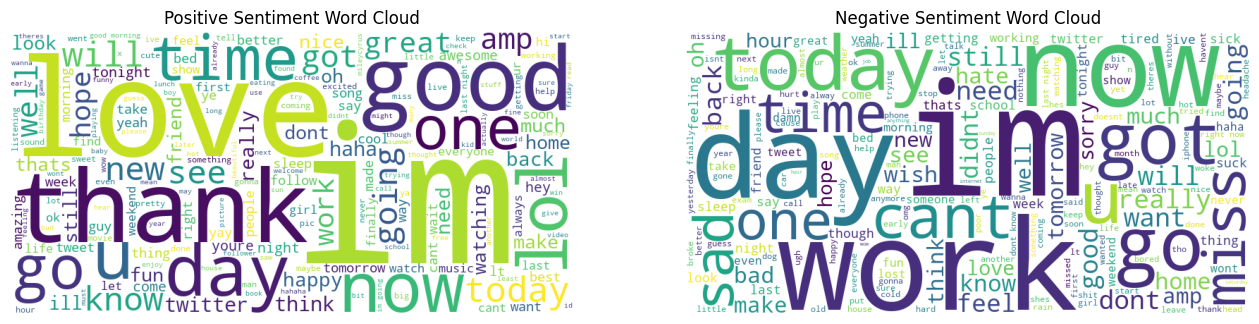

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(pos_wordcloud)
axes[0].set_title('Positive Sentiment Word Cloud')
axes[0].axis('off')

axes[1].imshow(neg_wordcloud)
axes[1].set_title('Negative Sentiment Word Cloud')
axes[1].axis('off')

plt.show()